<a href="https://colab.research.google.com/github/DiegoPincheiraIb/Experiencias_EL5206/blob/master/Experiencia_3/Experiencia_3_EL5206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiencia numero 3: Luckas Diaz - Diego Pincheira

# Configuraciones Preliminares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, exposure
import os
# pip install natsort # Se debe instalar natsorted para ejecutar el código
from natsort import natsorted
import cv2
from google.colab.patches import cv2_imshow
!pip install ipython-autotime
%load_ext autotime

Cargar los archivos *fondo.rar*, *seq1.rar*, *seq2.rar*, *seq3.rar* al notebook. De preferencia, cargar *seq4.rar* **solo cuando es necesario, debido al peso del archivo.**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving seq1.rar to seq1.rar
Saving seq2.rar to seq2.rar
Saving seq3.rar to seq3.rar
Saving fondo.rar to fondo.rar


Se descomprimen los archivos

In [ ]:
!unrar x fondo.rar
!unrar x seq1.rar
!unrar x seq2.rar
!unrar x seq3.rar
#!unrar x seq4.rar

In [3]:
!ls

fondo  fondo.rar  sample_data  seq1  seq1.rar  seq2  seq2.rar  seq3  seq3.rar
time: 121 ms


Se definen los path de las imagenes

In [2]:
Str_Fondo = 'fondo/'
Str_SEQ1 = 'seq1/'
Str_SEQ2 = 'seq2/'
Str_SEQ3 = 'seq3/'
#Str_SEQ4 = 'seq4/'
Listado_Fondo = os.listdir(Str_Fondo)
Listado_Fondo = natsorted(Listado_Fondo)
Listado_SEQ1 = os.listdir(Str_SEQ1)
Listado_SEQ1 = natsorted(Listado_SEQ1)
Listado_SEQ2 = os.listdir(Str_SEQ2)
Listado_SEQ2 = natsorted(Listado_SEQ2)
Listado_SEQ3 = os.listdir(Str_SEQ3)
Listado_SEQ3 = natsorted(Listado_SEQ3)
#Listado_SEQ4 = os.listdir(Str_SEQ4)
#Listado_SEQ4 = natsorted(Listado_SEQ4)

time: 20.4 ms


Convertir a escala de grises y equalizar las imagenes

In [10]:
def Equaliz_Array(String_Imagen,Listado_Imagen):
  Listado_Obj = np.ndarray((len(Listado_Imagen),800,1280))
  for i in range(len(Listado_Imagen)):
    Listado_Obj[i] = exposure.equalize_adapthist(color.rgb2gray(io.imread(String_Imagen + Listado_Imagen[i])))
  return Listado_Obj

time: 2.98 ms


Debido a que consume mucha memoria, **NO** es recomendable correr estos parámetros inmediatamente. Estos se calcularán solos al momento de hacer la diferencia binaria. Se dejan propuestos de igual manera para que se verifique su funcionamiento de manera individual, pero se aconseja borrar las variables una vez utilizadas.

In [4]:
#Listado_Fondo_Gris = Equaliz_Array(Str_Fondo,Listado_Fondo)
#Listado_SEQ1_Gris = Equaliz_Array(Str_SEQ1,Listado_SEQ1)
#Listado_SEQ2_Gris = Equaliz_Array(Str_SEQ2,Listado_SEQ2)
#Listado_SEQ3_Gris = Equaliz_Array(Str_SEQ3,Listado_SEQ3)

time: 35 s


# **Desarrollo P1.1**

In [11]:
def diff_frames(frame1, frame2, umbral):
  #restar frame y obtener valor absoluto
  resta = cv2.absdiff(frame1, frame2)
  #binarizar la imagen sobre un umbral, para seleccionar el movimiento
  resta_binaria = cv2.threshold(resta, umbral, 255, cv2.THRESH_BINARY)
  del resta
  return resta_binaria[1]

time: 3.74 ms


Cargar esta demostración solo si es necesario.

In [ ]:
diferencia = diff_frames(Listado_SEQ1_Gris[11],Listado_SEQ1_Gris[12],0.099)

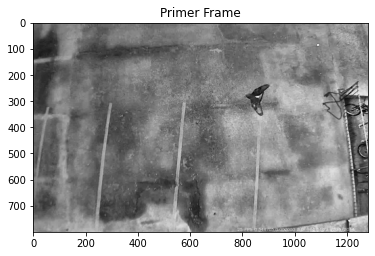

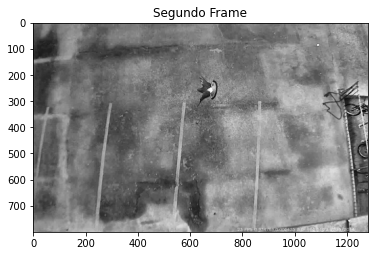

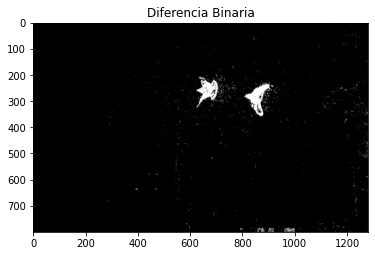

In [11]:
plt.figure()
plt.imshow(Listado_SEQ1_Gris[11], cmap='gray')
plt.title("Primer Frame")
plt.show()
plt.figure()
plt.imshow(Listado_SEQ1_Gris[12], cmap='gray')
plt.title("Segundo Frame")
plt.show()
plt.figure()
plt.imshow(diferencia, cmap='gray')
plt.title("Diferencia Binaria")
plt.show()

Calcular la diferencias de cuadros para las secuencias

In [12]:
def Diferencia_Cuadros(Str_Obj, Listado_Obj,Umbral_Obj):
  Diff_Obj = np.ndarray((len(Listado_Obj)-1,800,1280))
  Listado_Img_Obj = Equaliz_Array(Str_Obj, Listado_Obj)
  for i in range(len(Listado_Obj)-1):
    Diff_Obj[i] = diff_frames(Listado_Img_Obj[i],Listado_Img_Obj[i+1],Umbral_Obj)
  del Listado_Img_Obj
  return Diff_Obj

time: 2.53 ms


In [7]:
Diff_Fondo = Diferencia_Cuadros(Str_Fondo,Listado_Fondo,0.099)
Diff_SEQ1 = Diferencia_Cuadros(Str_SEQ1,Listado_SEQ1,0.099)
Diff_SEQ2 = Diferencia_Cuadros(Str_SEQ2,Listado_SEQ2,0.099)
Diff_SEQ3 = Diferencia_Cuadros(Str_SEQ3,Listado_SEQ3,0.099)

time: 1min 59s


# **Desarrollo P1.2**

In [14]:
def Media_STD(Str_Obj,Listado_Obj):
  Eq_Obj = Equaliz_Array(Str_Obj,Listado_Obj)
  Media_Obj = np.mean(Eq_Obj,axis=0)
  STD_Obj = np.std(Eq_Obj,axis=0)
  del Eq_Obj
  return Media_Obj, STD_Obj

time: 2.23 ms


In [ ]:
Media_Fondo, STD_Fondo = Media_STD(Str_SEQ2,Listado_SEQ2)

# Obsoleto

In [ ]:
Listado_Fondo_Gris = []
for imagen in Listado_Fondo:
  Listado_Fondo_Gris.append(exposure.equalize_adapthist(color.rgb2gray(cv2_read(Str_Fondo + imagen))))

Listado_SEQ1_Gris = []
for imagen in Listado_SEQ1:
  Listado_SEQ1_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_SEQ1 + imagen))))

Listado_SEQ2_Gris = []
for imagen in Listado_SEQ2:
  Listado_SEQ2_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_SEQ2 + imagen))))

Listado_SEQ3_Gris = []
for imagen in Listado_SEQ3:
  Listado_SEQ3_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_SEQ3 + imagen))))

#Listado_SEQ4_Gris = []
#for imagen in Listado_SEQ4:
#  Listado_SEQ4_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_SEQ4 + imagen))))

def Equaliz_Lista(String_Imagen,Listado_Imagen):
  Listado_Obj = []
  for imagen in Listado_Imagen:
    Listado_Obj.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(String_Imagen + imagen))))
  return Listado_Obj

In [ ]:
Diff_Seq1 = []
Diff_Seq2 = []
Diff_Seq3 = []

for i in range(len(Listado_SEQ1_Gris)-1):
  Diff_Seq1.append(diff_frames(Listado_SEQ1_Gris[i],Listado_SEQ1_Gris[i+1],0.099))
'''
for i in range(len(Listado_SEQ2_Gris)-1):
  Diff_Seq2.append(diff_frames(Listado_SEQ2_Gris[i],Listado_SEQ2_Gris[i+1],0.099))

for i in range(len(Listado_SEQ3_Gris)-1):
  Diff_Seq3.append(diff_frames(Listado_SEQ3_Gris[i],Listado_SEQ3_Gris[i+1],0.099))
  '''

Listado_Fondo_Gris = Equaliz_Array(Str_Fondo,Listado_Fondo)

def Diferencia_Cuadros(Str_Obj, Listado_Obj,Umbral_Obj):
  Diff_Obj = np.ndarray((len(Listado_Obj)-1,800,1280))
  Listado_Img_Obj = Equaliz_Array(Str_Obj, Listado_Obj)
  for i in range(len(Listado_Obj)-1):
    Diff_Obj[i] = diff_frames(Listado_Img_Obj[i],Listado_Img_Obj[i+1],Umbral_Obj)
  del Listado_Img_Obj
  return Diff_Obj

'\nfor i in range(len(Listado_SEQ2_Gris)-1):\n  Diff_Seq2.append(diff_frames(Listado_SEQ2_Gris[i],Listado_SEQ2_Gris[i+1],0.099))\n\nfor i in range(len(Listado_SEQ3_Gris)-1):\n  Diff_Seq3.append(diff_frames(Listado_SEQ3_Gris[i],Listado_SEQ3_Gris[i+1],0.099))\n  '

In [ ]:
def Equaliz_Lista(String_Imagen,Listado_Imagen):
  Listado_Obj = []
  for imagen in Listado_Imagen:
    Listado_Obj.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(String_Imagen + imagen))))
  return Listado_Obj
Listado_SEQ1_Gris = Equaliz_Lista(Str_SEQ1,Listado_SEQ1)